## Visualizing Monty Hall Problem

> To install ipywidgets refer the documentation https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [1]:
from IPython.display import display, clear_output
import ipywidgets as widgets
from datetime import datetime, timedelta
import ipywidgets as widgets
import random
import pandas as pd
import seaborn as sns


In [2]:
class Monty_Hall:
    def __init__(self):
        self.winner_door = random.randint(1,3)
    
    def door_selected(self, door):
        l1 = [1,2,3]
        l1.remove(door)
        if self.winner_door in l1:
            l1.remove(self.winner_door)
        open_door = random.choice(l1)
        return open_door
    
    def winner(self, door):
        return door == self.winner_door
        

In [3]:
class Generator():
    def __init__(self): 
        self.button1 = widgets.Button(description='Door 1')
        self.button2 = widgets.Button(description='Door 2')
        self.button3 = widgets.Button(description='Door 3')
    
    def get_buttons(self):
        return [self.button1, self.button2, self.button3]

    def remove_clicks(self):
        for button in self.get_buttons():
            button._click_handlers.callbacks = []

    def get_button_number(self, button):
        if button.description == "Door 1":
            return 1
        if button.description == "Door 2":
            return 2
        if button.description == "Door 3":
            return 3

    def generate_next_buttons(self, clicked, to_open):
        current_buttons = self.get_buttons()
        current_buttons[clicked] = widgets.Button(description='Door %s' % (clicked+1), icon="check", button_style="info")
        for b in current_buttons:
            b.on_click(self.on_phase2_clicked)
        current_buttons[to_open] = widgets.Button(description='No prize Here!', icon="xmark", button_style='warning', disabled=True)

        return current_buttons
    
    def generate_last_buttons(self):
        current_buttons = self.get_buttons()
       
        current_buttons[game.winner_door - 1] = widgets.Button(description='PRIZE', icon="gift", button_style="success")
        current_buttons[self.opened-1] = widgets.Button(description='No prize Here', icon="thumbs-down", button_style='warning', disabled=True)
        b_l = [1,2,3]
        b_l.remove(game.winner_door)
        b_l.remove(self.opened)
        current_buttons[b_l[0]-1] = widgets.Button(description='No prize Here', icon="thumbs-down", button_style='danger', disabled=True)
        return current_buttons
    
    def generate_display_2(self):
        out.clear_output()
        out.append_display_data(widgets.HTML("""<p style="font-size:20px;font-weight: bold">Good Guess!!</p>"""))
        out.append_display_data(widgets.HTML("""<p style="font-size:15px">As I am feeling generous today </br></p>
                                            <p style="font-size:15px;color:green;font-weight: bold">I am going 
                                            to eliminate one of the doors with no prize</p> </br>
                                            <p style="font-size:15px">I am also giving you 2 choices: </br>
                                            <b>1. Click again on your original guess and see if you were correct.</b></br>
                                            <b>2. Change your answer and choose the other door.</b></p>"""))
        display(out)


    def on_phase1_clicked(self, b):
        self.remove_clicks()
        clicked = self.get_button_number(b)
        self.opened = to_open = game.door_selected(clicked)
        new_buttons = self.generate_next_buttons(clicked-1, to_open-1)
        self.generate_display_2()
        out.append_display_data(widgets.HBox(new_buttons))
    
    def generate_winner(self):
        out.clear_output()
        out.append_display_data(widgets.HTML("""<p style="font-size:20px; font-weight: bold; color: green">
                                                Congratulations!!</p>"""))
        out.append_display_data(widgets.HTML("""<p style="font-size:15px; color: green">
                                                You have selected the winning door and won the Great Prize</p>"""))
    
    def generate_hard_luck(self):
        out.clear_output()
        out.append_display_data(widgets.HTML("""<p style="font-size:20px; font-weight: bold; color: Red">
                                                Hard Luck :( </p>"""))
        out.append_display_data(widgets.HTML("""<p style="font-size:15px; color: red">
                                                You have selected the wrong door, Please try again later</p>"""))
        
    
    def on_phase2_clicked(self, b):
        self.remove_clicks()
        clicked = self.get_button_number(b)
        win = game.winner(clicked)
        if win:
            self.generate_winner()
        else:
            self.generate_hard_luck()
        new_b = self.generate_last_buttons()
        out.append_display_data(widgets.HBox(new_b))
    

In [4]:
out = widgets.Output() 
game = Monty_Hall()
gen = Generator()

In [5]:
def run_interactive():
    out = widgets.Output() 
    game = Monty_Hall()
    gen = Generator()
    out.append_display_data(widgets.HTML("""<p style="font-size:25px;font-weight: bold">Welcome to Monty Hall Door Problem</p>"""))
    out.append_display_data(widgets.HTML("""<p style="font-size:15px;">Behind one of these doors is a Great Prize</br>Can you
                                            choose the correct door?</p>"""))

    #out.append_stdout(str(game.winner_door))
    display(out)



    buttons = gen.get_buttons()
    for b in buttons:
        b.on_click(gen.on_phase1_clicked)

    display(widgets.HBox(buttons))

In [6]:
def run_automated(n):
    op = []
    for i in range(n):
        game = Monty_Hall()
        options = [1,2,3]
        selected = random.choice(options)
        opened = game.door_selected(selected)
        options.remove(opened)
        final = random.choice(options)
        #print(options, "Selected ", selected, " Opened: ", opened, " Final: ",  final, " Prize Door: ", game.winner_door)
        s = "Switched"
        if final == selected:
            s = "Not Switched"
        win = "Lost"
        if game.winner(final):
            win = "Won"
        #print(s, win)
        op.append([s, win])


    df = pd.DataFrame(op, columns=["Decision", "Result"])
    sns.countplot(data=df, x="Decision", hue="Result")
    switched, not_switched = df["Decision"].value_counts()
    print("Total number of iterations = %s \nDecision(Switched) = %s \nDecision(Not Switched) = %s" % (n, switched, not_switched))
    print()
    print("Decision(Switched) & Result(Won) = %s" % df[(df["Decision"] == "Switched") & (df["Result"] == "Won")].value_counts()[0])
    print("Decision(Not Switched) & Result(Lost) = %s" % df[(df["Decision"] == "Not Switched") & (df["Result"] == "Lost")].value_counts()[0])

In [7]:
run_interactive()

HTML(value='<p style="font-size:25px;font-weight: bold">Welcome to Monty Hall Door Problem</p>')

HTML(value='<p style="font-size:15px;">Behind one of these doors is a Great Prize</br>Can you\n               …

Output(outputs=({'output_type': 'display_data', 'data': {}, 'metadata': {}}, {'output_type': 'display_data', '…

HTML(value='<p style="font-size:20px;font-weight: bold">Good Guess!!</p>')

HTML(value='<p style="font-size:15px">As I am feeling generous today </br></p>\n                              …

Output(outputs=({'output_type': 'display_data', 'data': {}, 'metadata': {}}, {'output_type': 'display_data', '…

HTML(value='<p style="font-size:20px; font-weight: bold; color: Red">\n                                       …

HTML(value='<p style="font-size:15px; color: red">\n                                                You have s…

Total number of iterations = 2000 
Decision(Switched) = 1024 
Decision(Not Switched) = 976

Decision(Switched) & Result(Won) = 667
Decision(Not Switched) & Result(Lost) = 627


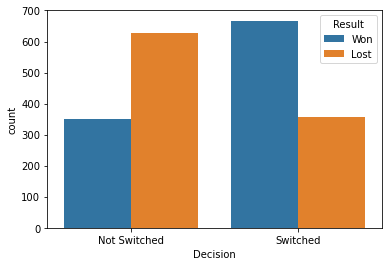

In [8]:
run_automated(2000)